In [1]:
import pandas as pd
df_green = pd.read_excel('GA Green Spaces.xlsx')
pd.set_option('display.max_columns', None)
df_green.head()

/Users/tanazmeghjani/.pyenv/versions/3.9.7/lib/python3.9/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


,Park name,Address,Acreage,Classification,NPU,Council District,Zip,Latitude,Longitude
0,17th Street Park,138 17th Street NE,2.30,NP,E,6.0,30309,38.891883,-76.981044
1,25th Street Median,"25th St., Alden Ave./ Standish Ave. NW",0.11,Greenspot,E,8.0,30309,33.799930,-84.395799
2,70 Boulevard Pedal Park,70 Boulevard,NaN,Park in Holding,E,8.0,NaN,40.899544,-74.429091
3,A.D. Williams Park*,"1154 James Jackson Parkway, NW",11.00,Community,G,9.0,30318,33.787628,-84.477842
4,Abner Place Park,Across from 2539 Abner Pl. NW,0.37,Greenspot,G,9.0,30318,33.798055,-84.467764


In [2]:
df_green.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 363 entries, 0 to 362
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Park name         363 non-null    object 
 1   Address           362 non-null    object 
 2   Acreage           353 non-null    float64
 3   Classification    360 non-null    object 
 4   NPU               360 non-null    object 
 5   Council District  360 non-null    float64
 6   Zip               362 non-null    object 
 7   Latitude          354 non-null    float64
 8   Longitude         354 non-null    float64
dtypes: float64(4), object(5)
memory usage: 25.6+ KB


In [3]:
df_green['Acreage'] = pd.to_numeric(df_green['Acreage'])

In [4]:
df_green.columns = df_green.columns.str.lower()
df_green.columns = df_green.columns.str.replace(" ","_")
df_green["park_name"] = df_green["park_name"].str.lower()
df_green["address"] = df_green["address"].str.lower()
df_green["classification"] = df_green["classification"].str.lower()

In [5]:
df_green = df_green.replace('park in holdingk', 'park in-holding')
df_green = df_green.replace('park in holding', 'park in-holding')
df_green = df_green.replace('community/park in holding', 'community/park in-holding')
df_green = df_green.replace('neighborhood trail/park in holding', 'neighborhood trail/park in-holding')
df_green = df_green.replace('special facilty', 'special facility')
df_green = df_green.replace('conservation', 'conservation park')
df_green = df_green.replace('community playlot', 'playlot')
df_green = df_green.replace('ggreenspot', 'greenspot')
df_green = df_green.replace('regional', 'regional park')
df_green = df_green.replace('community', 'community park')
df_green = df_green.replace('neighborhood', 'neighborhood park')

<AxesSubplot:>

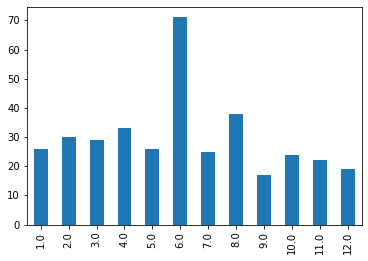

In [6]:
# District 6 has the most green spaces
df_green['council_district'].value_counts().sort_index().plot(kind='bar')

<AxesSubplot:xlabel='council_district'>

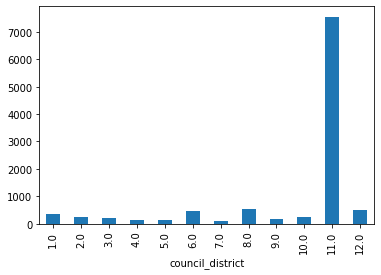

In [7]:
df_green.groupby(by='council_district').acreage.sum().plot(kind='bar')

In [8]:
# Looking at what type of green spaces each district has
pd.set_option('display.max_rows', None)
df_green.groupby(df_green['council_district']).classification.value_counts()

council_district  classification                    
1.0               neighborhood park                      8
                  greenspot                              6
                  playlot                                4
                  community park                         3
                  nature preserve                        2
                  community/park in-holding              1
                  regional park                          1
                  special facility                       1
2.0               greenspot                              7
                  plaza                                  7
                  playlot                                4
                  regional park                          4
                  community park                         3
                  special facility                       3
                  neighborhood park                      2
3.0               greenspot                             11
   

<AxesSubplot:>

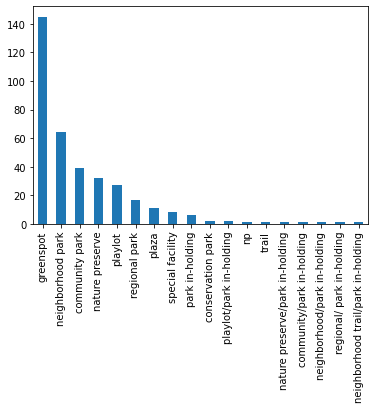

In [9]:
# greenspots are most common. according to definitions, greenspots are "small patches of grass" and 
# are "too small to be considered programmable space"
df_green['classification'].value_counts().plot(kind='bar')

In [11]:
# neighborhood parks, community parks, playlots, regional parks, nature preserves, plazas, and trails are all defined as places were community members can gather
parks = df_green["classification"].isin(["neighborhood park", "community park", "playlot", "regional park", "nature preserve", "plaza", "trail corridor" ])
parks = df_green[parks]
parks.describe()

,acreage,council_district,latitude,longitude
count,189.000000,190.000000,185.000000,185.000000
mean,17.683810,5.889474,33.918728,-84.227610
std,39.092218,3.295563,1.754249,7.055826
min,0.000000,1.000000,26.004804,-121.966184
25%,1.370000,3.000000,33.732049,-84.421307
50%,5.050000,6.000000,33.761919,-84.385375
75%,13.730000,8.750000,33.797023,-84.364227
max,268.000000,12.000000,51.499370,-0.127299


In [12]:
parks.council_district.sort_values().to_frame
parks

,park_name,address,acreage,classification,npu,council_district,zip,latitude,longitude
3,a.d. williams park*,"1154 james jackson parkway, nw",11.00,community park,G,9.0,30318,33.787628,-84.477842
5,adair park i,742 catherine st. sw,6.39,neighborhood park,V,4.0,30310,33.725085,-84.411686
6,adair park ii,866 murphy ave. sw,10.60,neighborhood park,V,4.0,30310,33.732049,-84.411686
7,adams park*,2300 wilson dr. sw,158.44,regional park,R,11.0,30311,33.710338,-84.463206
8,adamsville gym park*,3404 delmar lane sw,0.82,neighborhood park,H,10.0,30331,33.756517,-84.500061
9,adamsville recreation center*,"3201 martin luther king, jr. dr. sw",11.00,community park,I,10.0,30311,33.754835,-84.491777
11,alexander park,e. wesley rd. / alexander dr. nw,11.60,nature preserve,B,7.0,30305,33.828639,-84.377366
12,anderson park*,98 anderson ave. nw,56.70,community park,J,3.0,30314,33.756157,-84.451274
13,ansley park,"maddox dr. / e. park lane, ne",6.11,neighborhood park,E,6.0,30309,33.795818,-84.376498
15,ardmore park,ardmore rd. off collier rd. nw,1.74,playlot,E,8.0,30309,33.809535,-84.414543


<AxesSubplot:>

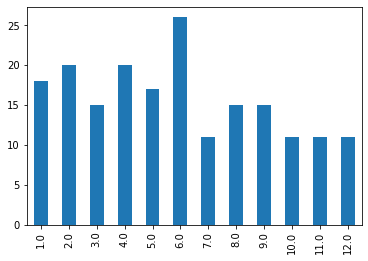

In [13]:
# districts 2, 4, and 6 have the most spaces for communities to gather.
parks['council_district'].value_counts().sort_index().plot(kind='bar')

<AxesSubplot:xlabel='council_district'>

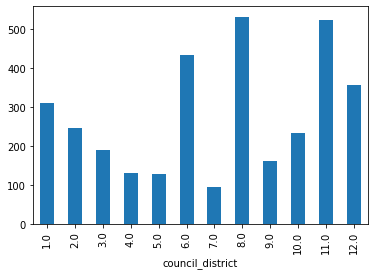

In [14]:
# but district 8 and 11 have the most acres of community gathering spaces
parks.groupby(by='council_district').acreage.sum().plot(kind='bar')

In [15]:
#data on atl council districts such as median income and race
df_atl = pd.read_excel('atl.xlsx')
df_atl.head(12)

,council_district,total_population,median_age,total_housing_units,persons_per_household,median_household_income,white,black,asian,other,acres
0,1,36318,33.6,16492,2.46,42271,28,65,2,5,6416.34
1,2,46808,34.5,32806,1.54,70413,59,29,7,5,2795.27
2,3,40968,27.3,21142,2.07,35353,24,58,14,4,4803.14
3,4,35768,28.5,15414,2.27,27975,9,86,3,3,4017.51
4,5,39707,34.8,21928,1.99,56466,42,50,3,4,4702.27
5,6,48841,33.4,26309,1.93,76667,69,14,8,9,5051.90
6,7,44516,37.2,27322,1.81,89469,74,13,8,6,5061.90
7,8,44323,41.0,23470,2.04,106751,83,9,6,3,12060.39
8,9,40132,33.0,23470,2.30,46467,31,58,4,7,11347.01
9,10,35065,38.0,16561,2.54,31655,2,94,0,4,8674.13


<AxesSubplot:xlabel='council_district'>

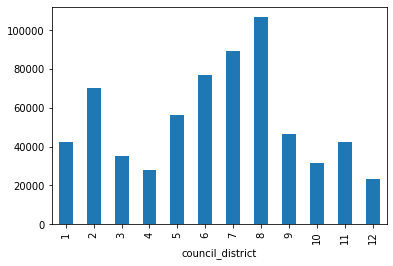

In [16]:
# district 6, 7, and 8 have the highest median incomes. Intuitively makes sense for 6 and 8. but bizarre 
# for 7 because there are so few green spaces in 7 despite having a higher median household income
df_atl.groupby(df_atl['council_district']).median_household_income.sum().plot(kind='bar')

In [17]:
df_atl = df_atl.set_index('council_district')
df_atl['number_of_parks'] = parks['council_district'].value_counts().sort_index()
df_atl['acres_of_park_space'] = parks.groupby(by='council_district').acreage.sum()
df_atl

,total_population,median_age,total_housing_units,persons_per_household,median_household_income,white,black,asian,other,acres,number_of_parks,acres_of_park_space
council_district,,,,,,,,,,,,
1,36318,33.6,16492,2.46,42271,28,65,2,5,6416.34,18,310.51
2,46808,34.5,32806,1.54,70413,59,29,7,5,2795.27,20,246.82
3,40968,27.3,21142,2.07,35353,24,58,14,4,4803.14,15,190.47
4,35768,28.5,15414,2.27,27975,9,86,3,3,4017.51,20,129.72
5,39707,34.8,21928,1.99,56466,42,50,3,4,4702.27,17,127.10
6,48841,33.4,26309,1.93,76667,69,14,8,9,5051.90,26,434.51
7,44516,37.2,27322,1.81,89469,74,13,8,6,5061.90,11,95.50
8,44323,41.0,23470,2.04,106751,83,9,6,3,12060.39,15,532.46
9,40132,33.0,23470,2.30,46467,31,58,4,7,11347.01,15,160.95


In [18]:
df_atl['percent_of_acres'] = (df_atl.acres_of_park_space/df_atl.acres)*100
df_atl['people_per_acre'] = df_atl.total_population/df_atl.acres_of_park_space
df_atl.reset_index(inplace=True)
df_atl

,council_district,total_population,median_age,total_housing_units,persons_per_household,median_household_income,white,black,asian,other,acres,number_of_parks,acres_of_park_space,percent_of_acres,people_per_acre
0,1,36318,33.6,16492,2.46,42271,28,65,2,5,6416.34,18,310.51,4.839363,116.962417
1,2,46808,34.5,32806,1.54,70413,59,29,7,5,2795.27,20,246.82,8.829916,189.644275
2,3,40968,27.3,21142,2.07,35353,24,58,14,4,4803.14,15,190.47,3.965531,215.088990
3,4,35768,28.5,15414,2.27,27975,9,86,3,3,4017.51,20,129.72,3.228866,275.732347
4,5,39707,34.8,21928,1.99,56466,42,50,3,4,4702.27,17,127.10,2.702950,312.407553
5,6,48841,33.4,26309,1.93,76667,69,14,8,9,5051.90,26,434.51,8.600922,112.404778
6,7,44516,37.2,27322,1.81,89469,74,13,8,6,5061.90,11,95.50,1.886643,466.136126
7,8,44323,41.0,23470,2.04,106751,83,9,6,3,12060.39,15,532.46,4.414948,83.241934
8,9,40132,33.0,23470,2.30,46467,31,58,4,7,11347.01,15,160.95,1.418435,249.344517
9,10,35065,38.0,16561,2.54,31655,2,94,0,4,8674.13,11,232.16,2.676464,151.038077


In [19]:
from plotnine.data import mtcars
from plotnine import ggplot, aes, geom_point, labs, theme_bw, facet_wrap, geom_smooth
from plotnine import *

import numpy as np

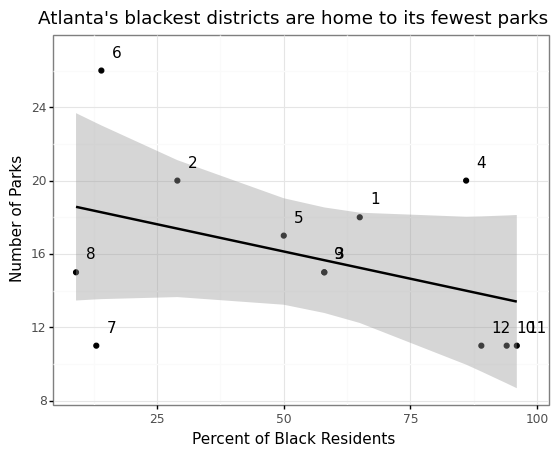

<ggplot: (352339411)>

In [55]:
(
    ggplot(df_atl,          
        aes('black', 'number_of_parks', label='council_district')) 
        + geom_point()
        + geom_smooth(method='lm')
        + geom_text(ha='left', nudge_x=2, nudge_y=1)
        + theme_bw()
        + labs(
            title = "Atlanta's blackest districts are home to its fewest parks",
            y = "Number of Parks",
            x = "Percent of Black Residents"
        )
)  

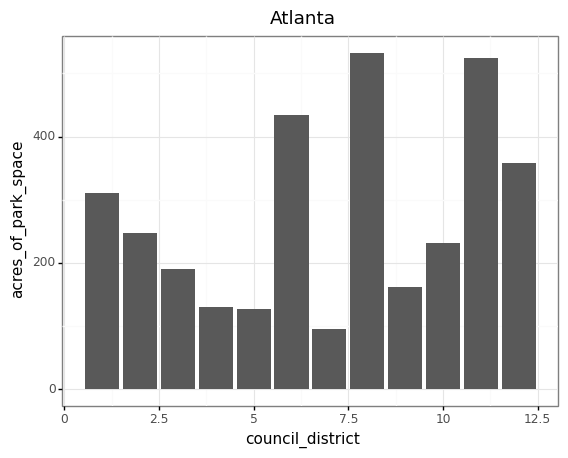

<ggplot: (305545024)>

In [54]:
(
    ggplot(df_atl) 
        + geom_col(aes(x='council_district', y="acres_of_park_space"))
        + theme_bw()
        + labs(
            title = "Atlanta",
        )
)  